In [1]:
import os; os.chdir("..")

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [20]:
import matplotlib.pyplot as plt
from urbanstats.games.quiz_analysis import get_full_statistics, questions

In [23]:
result = get_full_statistics(after_problem=41, debug=False)
num_users_by_problem = result.groupby("problem").count().user_id
means = result.groupby("problem").mean()

In [24]:
result

,user_id,host,problem,pattern,time,q1,q2,q3,q4,q5,score
0,225074120239201340,urbanstats.org,41,"[1, 0, 1, 1, 0]",NaT,1,0,1,1,0,3
1,225074120239201340,urbanstats.org,42,"[1, 1, 1, 1, 1]",NaT,1,1,1,1,1,5
2,225074120239201340,urbanstats.org,43,"[0, 1, 0, 1, 0]",NaT,0,1,0,1,0,2
3,225074120239201340,urbanstats.org,44,"[1, 1, 0, 0, 1]",NaT,1,1,0,0,1,3
4,225074120239201340,urbanstats.org,45,"[1, 1, 1, 0, 1]",NaT,1,1,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...
74,903340165517424373,urbanstats.org,44,"[1, 1, 1, 0, 0]",2023-10-21 02:44:42.777999872,1,1,1,0,0,3
75,903340165517424373,urbanstats.org,45,"[1, 1, 1, 0, 1]",2023-10-21 02:44:42.777999872,1,1,1,0,1,4
76,903340165517424373,urbanstats.org,46,"[1, 1, 1, 0, 0]",2023-10-21 02:44:42.777999872,1,1,1,0,0,3
77,903340165517424373,urbanstats.org,47,"[1, 0, 1, 1, 1]",2023-10-21 02:44:42.777999872,1,0,1,1,1,4


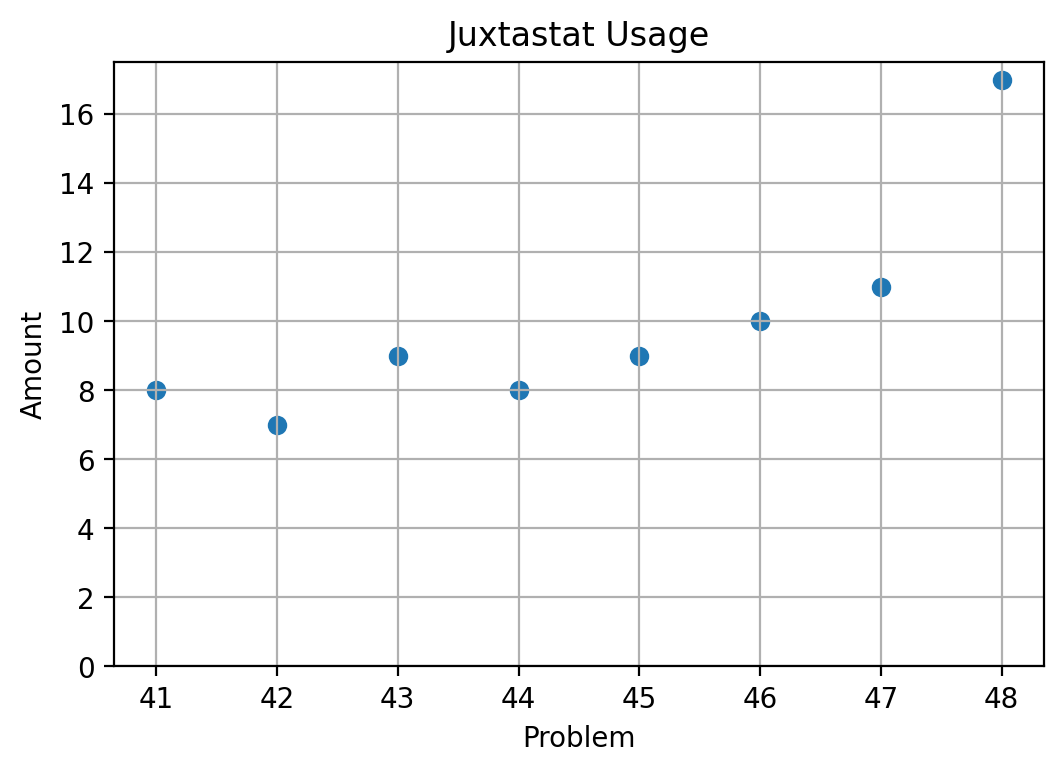

In [25]:
plt.figure(dpi=200)
plt.title("Juxtastat Usage")
plt.scatter(num_users_by_problem.index, num_users_by_problem)
plt.xlabel("Problem")
plt.ylabel("Amount")
plt.ylim(0, plt.ylim()[1])
plt.grid()

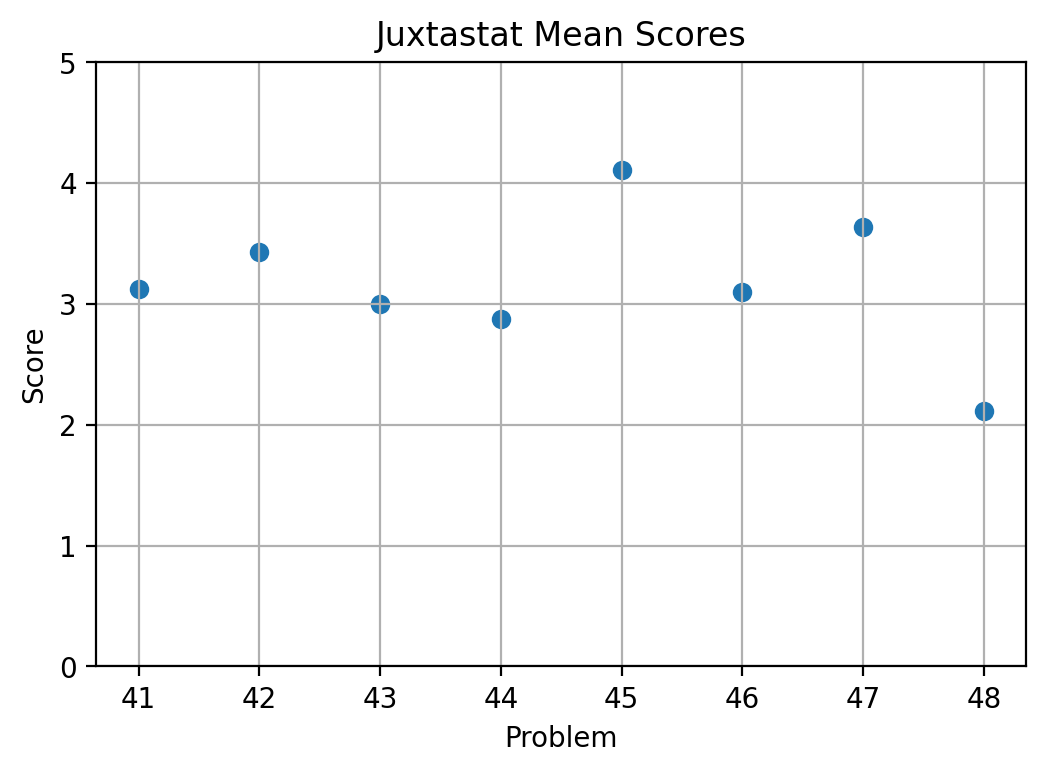

In [26]:
plt.figure(dpi=200)
plt.title("Juxtastat Mean Scores")
plt.scatter(means.index, means.score)
plt.ylim(0, 5)
plt.xlabel("Problem")
plt.ylabel("Score")
plt.grid()

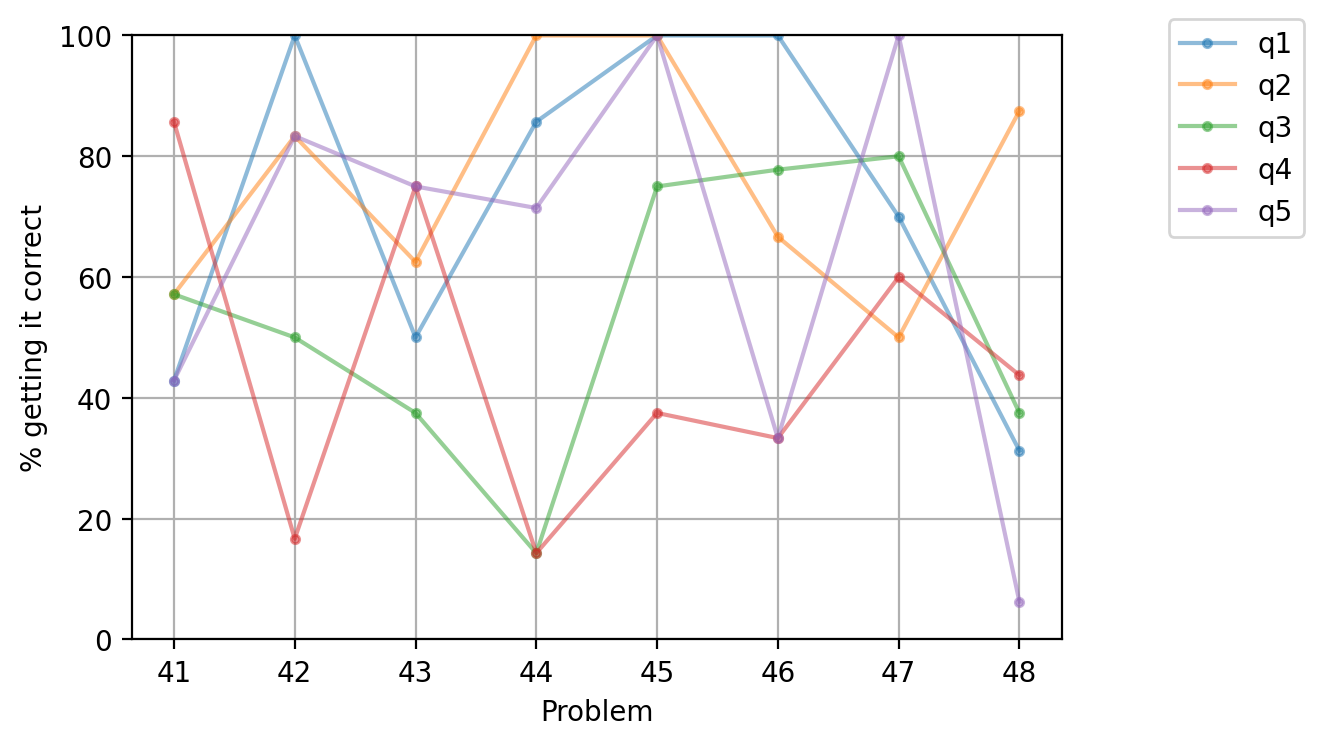

In [7]:
plt.figure(dpi=200)
for q in questions:
    plt.plot(means.index, 100 * means[q], label=q, marker=".", alpha=0.5)
plt.ylim(0, 100)
plt.xlabel("Problem")
plt.ylabel("% getting it correct")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.grid()